In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [8]:
# View all of the classes that automap found
classes=[ class_.__name__ for class_ in Base.classes]
classes

['measurement', 'station']

In [9]:
# Save references to each table
station=Base.classes.station
measurement=Base.classes.measurement

In [11]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
most_recent_date=session.query(func.max(measurement.date)).scalar()
most_recent_date

'2017-08-23'

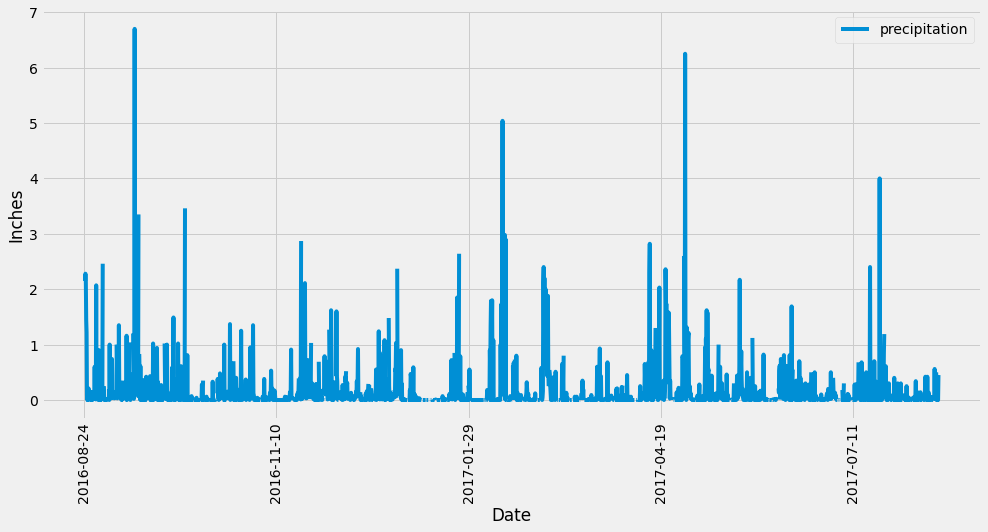

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago=dt.datetime.strptime(most_recent_date, '%Y-%m-%d')-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results=session.query(measurement.date,measurement.prcp).\
                filter(measurement.date>=one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df=pd.DataFrame(results,columns=['date','precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df=df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(rot=90,figsize=(15,7))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='best')
plt.show()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
station_count=session.query(func.count(station.station)).scalar()
station_count

9

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations=session.query(measurement.station,func.count(measurement.station)).\
                        group_by(measurement.station).\
                        order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station=session.query(func.min(measurement.tobs),
                                       func.max(measurement.tobs),
                                       func.avg(measurement.tobs)).\
                                       filter(measurement.station==active_stations[0][0]).all()
    
most_active_station  

[(54.0, 85.0, 71.66378066378067)]

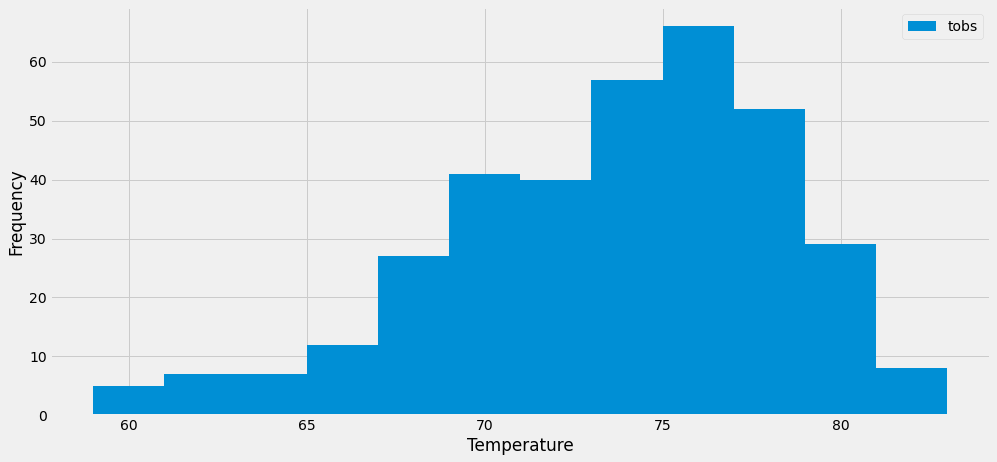

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_tobs=session.query(measurement.tobs).\
                            filter(measurement.station==active_stations[0][0]).\
                            filter(measurement.date>=one_year_ago).all()
tobs_df=pd.DataFrame(most_active_station_tobs,columns=['tobs'])
tobs_df.plot.hist(bins=12,figsize=(15,7))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()

# Close Session

In [30]:
# Close Session
session.close()